# Plot相关

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data part
# US GDP and consumption 
gdp  = [13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3]
pce  = [8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7]
year = list(range(2003,2014))        # use range for years 2003-2013 

# create DataFrame from dictionary
us = pd.DataFrame({'gdp': gdp, 'pce': pce}, index = year)

## DataFrame plot function

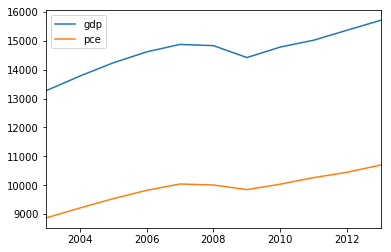

In [3]:
# DataFrame plot function
us.plot()

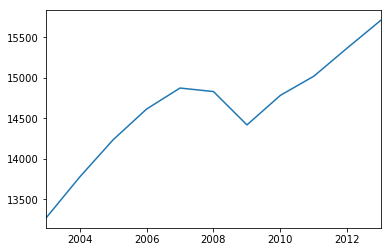

In [4]:
us.gdp.plot()

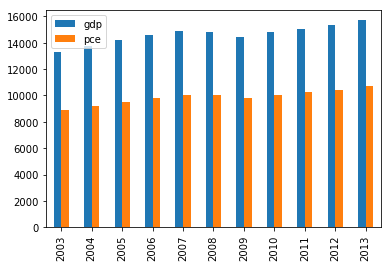

In [5]:
# bar chart
us.plot(kind='bar')

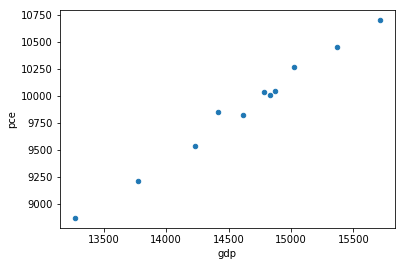

In [6]:
# scatter plot
# need to be explicit about the x and y variables: x='gdp', y='pce'
us.plot.scatter('gdp', 'pce')

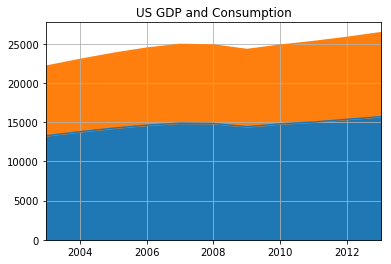

In [7]:
# area
us.plot(kind='area', title='US GDP and Consumption', grid=True, legend=False)

## maplotlib package

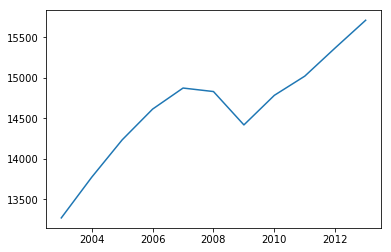

In [8]:
# simple plot, give x and y
plt.plot(us.index, us.gdp)

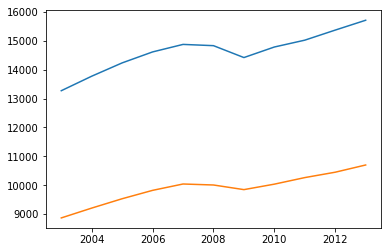

In [9]:
plt.plot(us.index, us.gdp)
plt.plot(us.index, us.pce)

<Container object of 11 artists>

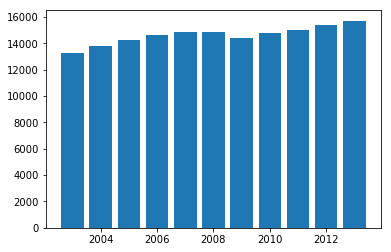

In [10]:
# bar
plt.bar(us.index, us.gdp, align='center')

## matplotlib.pyplot - figure objects

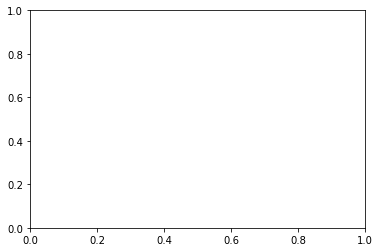

In [11]:
# create fig and ax objects
fig, ax = plt.subplots()

In [12]:
# add things by applying methods to ax
ax.plot(us.index, us.gdp, linewidth=2, color='magenta')
ax.set_title('US GDP', fontsize=14, loc='left')
ax.set_ylabel('Billions of USD')
ax.set_xticks([2004, 2008, 2012])
ax.grid(True)

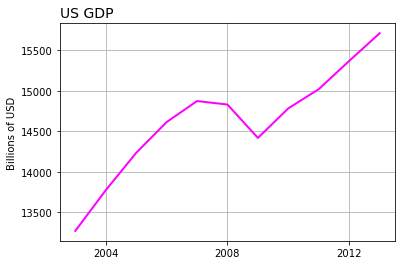

In [13]:
fig

### mutiple subplots

Object ax has 2 dimensions


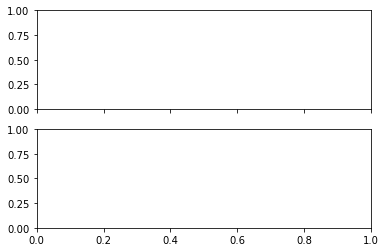

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
print('Object ax has {} dimensions'.format(len(ax)))

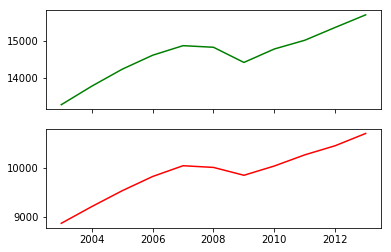

In [15]:
# add some content
ax[0].plot(us.index, us.gdp, color='green')
ax[1].plot(us.index, us.pce, color='red')
fig

### Two Scales figure

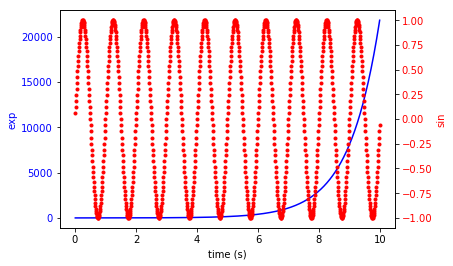

In [16]:
fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color
ax1.set_ylabel('exp', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
s2 = np.sin(2*np.pi*t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

## Grab figure and axis - combining pandas and plt

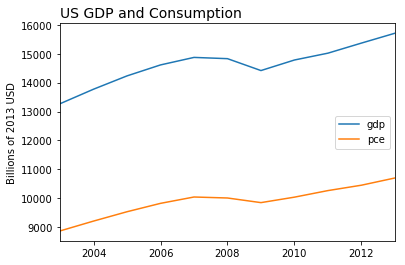

In [17]:
# grab ax and apply methods
ax = us.plot()
ax.set_title('US GDP and Consumption', fontsize=14, loc='left')
ax.set_ylabel('Billions of 2013 USD')
ax.legend(loc='center right')

**Comment** If we want the figure object for this plot, we apply a method to the axis object: `fig = ax.get_figure()`  
That's not something we'll do often, but it completes the connection between `df.plot()` approach and `fig, ax` approach

## Examples

### Example 2. World Bank data
We'll use World Bank data for GDP, GDP per capita, and life expectancy to produce a few graphs and illsutrate some methods we haven't seen yet.   

* Bar charts of GDP and GDP per capita 
* Scatter plot (bubble plot) of life expectancy v GDP per capita 

In [18]:
# load packages (redundancy is ok)
import pandas as pd                   # data management tools
from pandas_datareader import data, wb # World Bank api
import matplotlib.pyplot as plt       # plotting tools
%matplotlib inline

# variable list (GDP, GDP per capita, life expectancy)
var = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD', 'SP.DYN.LE00.IN']  
# country list (ISO codes)
iso = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
year = 2013

# get data from World Bank 
df = wb.download(indicator=var, country=iso, start=year, end=year)

# massage data
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp', 'life'] # rename variables
df['pop']  = df['gdp']/df['gdppc']    # population 
df['gdp'] = df['gdp']/10**12          # convert to trillions
df['gdppc'] = df['gdppc']/10**3       # convert to thousands
df['order'] = [5, 3, 1, 4, 2, 6, 0]   # reorder countries
df = df.sort_values(by='order', ascending=False)

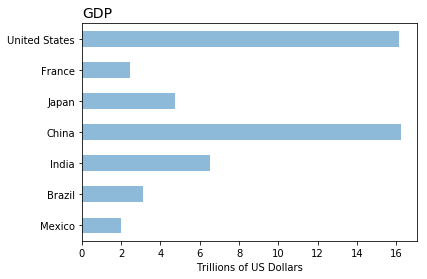

In [19]:
# GDP bar chart
ax = df['gdp'].plot(kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')